Consistency Score (Wicketkeeper) = W1 * (Inns / Mat) + W2 * (Dismissed) + W3 * (Catches taken) + W4 * (Stumpings) + W5 * (Max Dis Inns) + W6 * (Dis/Inn)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def analyze_and_visualize(df):
    # Select Features for Analysis
    features = ['Mat', 'Inns', 'Dismissed', 'Catches taken', 'Stumpings', 'Max Dis Inns', 'Dis/Inn']
    df_analysis = df[features]
    
    # Replace infinities and NaN with 0
    df_analysis = df_analysis.replace([np.inf, -np.inf], 0)
    df_analysis = df_analysis.fillna(0)
    
    # Correlation Analysis
    correlation_matrix = df_analysis.corr()
    
    # Visualize Correlation Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Features')
    plt.show()
    
    return df_analysis


In [3]:
def calculate_wicketkeeper_formula_components(df):
    """
    Calculates the components of the Wicketkeeper Consistency Score formula.
    
    Consistency Score (Wicketkeeper) = w1 * (Inns / Mat) +
                                      w2 * (Dismissed) +
                                      w3 * (Catches taken) +
                                      w4 * (Stumpings) +
                                      w5 * (Max Dis Inns) +
                                      w6 * (Dis/Inn)
    """
    df_components = df.copy()

    # Ensure numeric types for calculations (handle potential NaN from coercion)
    df_components['Inns'] = pd.to_numeric(df_components['Inns'], errors='coerce')
    df_components['Mat'] = pd.to_numeric(df_components['Mat'], errors='coerce')
    df_components['Dismissed'] = pd.to_numeric(df_components['Dismissed'], errors='coerce')
    df_components['Catches taken'] = pd.to_numeric(df_components['Catches taken'], errors='coerce')
    df_components['Stumpings'] = pd.to_numeric(df_components['Stumpings'], errors='coerce')
    df_components['Max Dis Inns'] = pd.to_numeric(df_components['Max Dis Inns'], errors='coerce')
    df_components['Dis/Inn'] = pd.to_numeric(df_components['Dis/Inn'], errors='coerce')

    # Perform calculations, ensure float division and handle potential NaN values
    df_components['Inns_per_Mat'] = df_components['Inns'].astype(float) / df_components['Mat'].astype(float)
    df_components['Dismissed'] = df_components['Dismissed'].astype(float) 
    df_components['Catches_per_Dismissed'] = df_components['Catches taken'].astype(float)
    df_components['Stumpings_per_Dismissed'] = df_components['Stumpings'].astype(float)
    df_components['MaxDisInns_per_Inns'] = df_components['Max Dis Inns'].astype(float) 
    df_components['DisInn'] = df_components['Dis/Inn'].astype(float)

    return df_components


In [5]:
data = pd.read_excel("../../cleaned all season/wicket_keeperset_ipl.xlsx")
df = data.copy()
print("Data types of your columns before calculation:")


Data types of your columns before calculation:


In [6]:
numeric_cols = ['Inns', 'Mat', 'Dismissed', 'Catches taken', 'Stumpings', 'Max Dis Inns', 'Dis/Inn']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Use df here

# Verify data types AFTER explicit conversion
print("\nData types of your columns AFTER explicit numeric conversion:")
print(df.dtypes)  # Use df here

# --- Correctly Remove Rows with NaN Values ---
cols_to_check_nan = ['Inns', 'Mat', 'Dismissed', 'Catches taken', 'Stumpings', 'Max Dis Inns', 'Dis/Inn']
print("\nNumber of NaN values BEFORE removing:")
print(df[cols_to_check_nan].isna().sum())  # Check NaN counts in relevant columns before removal

df_cleaned = df.dropna(subset=cols_to_check_nan, how='any')  # Use how='any' to drop row if ANY of these cols is NaN
print("\nNumber of rows BEFORE removing NaNs:", len(df))
print("Number of rows AFTER removing NaNs:", len(df_cleaned))  # Print length of df_cleaned

# Calculate wicketkeeper formula components using the CLEANED data (df_cleaned)
calculations_with_data = calculate_wicketkeeper_formula_components(df_cleaned)  # Pass df_cleaned

# Select the component columns for correlation analysis
component_columns = [
    'Inns_per_Mat',
    'Dismissed',
    'Catches_per_Dismissed',
    'Stumpings_per_Dismissed',
    'MaxDisInns_per_Inns',
    'DisInn'
]

# Calculate the correlation matrix for the components
correlation_matrix = calculations_with_data[component_columns].corr()  # Use calculations_with_data

# Display the correlation matrix
print("\nCorrelation Matrix of Wicketkeeper Consistency Formula Components (after NaN removal):")
print(correlation_matrix)



Data types of your columns AFTER explicit numeric conversion:
Player                 object
Span                   object
Mat                     int64
Inns                    int64
Dismissed               int64
Catches taken           int64
Stumpings               int64
Max Dis Inns            int64
Dis/Inn               float64
Max Dis Inns Type      object
MostCommonPosition      int64
Type                   object
dtype: object

Number of NaN values BEFORE removing:
Inns             0
Mat              0
Dismissed        0
Catches taken    0
Stumpings        0
Max Dis Inns     0
Dis/Inn          0
dtype: int64

Number of rows BEFORE removing NaNs: 15
Number of rows AFTER removing NaNs: 15

Correlation Matrix of Wicketkeeper Consistency Formula Components (after NaN removal):
                         Inns_per_Mat  Dismissed  Catches_per_Dismissed  \
Inns_per_Mat                 1.000000   0.366282               0.356054   
Dismissed                    0.366282   1.000000            

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_wicketkeeper_consistency_components(df_components):
    features = [
        'Inns_per_Mat',
        'Dismissed',
        'Catches_per_Dismissed',
        'Stumpings_per_Dismissed',
        'MaxDisInns_per_Inns',
        'DisInn'
    ]
    df_analysis = df_components[features].copy()  # Use .copy() to avoid SettingWithCopyWarning

    # Replace infinities and NaN with 0 - Handle potential issues from calculations
    df_analysis = df_analysis.replace([np.inf, -np.inf], 0)
    df_analysis = df_analysis.fillna(0)

    # Correlation Analysis
    correlation_matrix = df_analysis.corr()
    print(correlation_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5)  # Added fmt and linewidths for better readability
    plt.title('Correlation Matrix of Wicketkeeper Consistency Formula Components')
    plt.show()

    return df_analysis


                         Inns_per_Mat  Dismissed  Catches_per_Dismissed  \
Inns_per_Mat                 1.000000   0.366282               0.356054   
Dismissed                    0.366282   1.000000               0.997707   
Catches_per_Dismissed        0.356054   0.997707               1.000000   
Stumpings_per_Dismissed      0.388083   0.974426               0.956981   
MaxDisInns_per_Inns          0.319282   0.488924               0.481660   
DisInn                       0.437830  -0.010996               0.004204   

                         Stumpings_per_Dismissed  MaxDisInns_per_Inns  \
Inns_per_Mat                            0.388083             0.319282   
Dismissed                               0.974426             0.488924   
Catches_per_Dismissed                   0.956981             0.481660   
Stumpings_per_Dismissed                 1.000000             0.496813   
MaxDisInns_per_Inns                     0.496813             1.000000   
DisInn                              

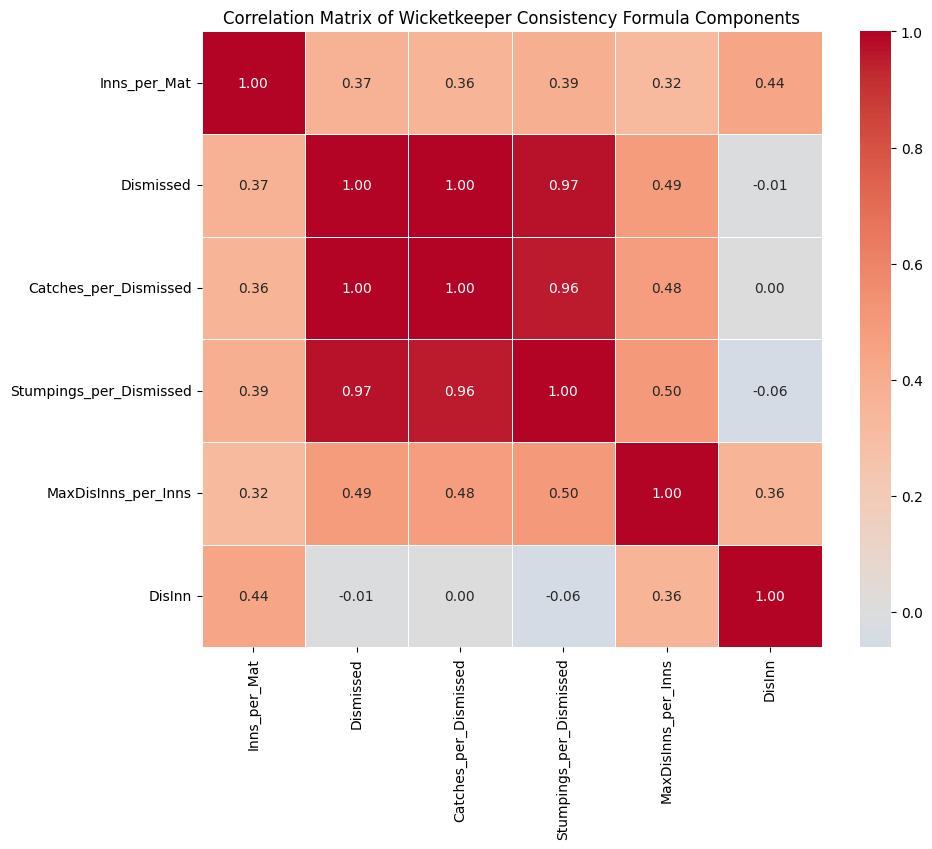

In [8]:
analyzed_df = analyze_wicketkeeper_consistency_components(calculations_with_data)

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt

# Assuming calculations_with_data is your DataFrame after computing the derived metrics,
# and that it includes the following component columns for wicketkeepers:
features = [
    'Inns_per_Mat', 
    'Dismissed', 
    'Catches_per_Dismissed', 
    'Stumpings_per_Dismissed', 
    'MaxDisInns_per_Inns', 
    'DisInn'
]

#########################################
# 1. Principal Component Analysis (PCA)
#########################################

# Prepare the data: fill any NaN and standardize the features
df_pca = calculations_with_data[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Run PCA
pca = PCA(n_components=len(features))
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame of loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(features))],
                        index=features)
print("PCA Loadings (each column is a principal component):")
print(loadings)

# You can use the loadings for PC1 (which explains most variance) as guidance for the weights:
pc1_loadings = loadings['PC1']
# Normalize the PC1 loadings (absolute values) to sum to 1:
pca_weights = (np.abs(pc1_loadings) / np.abs(pc1_loadings).sum()).sort_values(ascending=False)
print("\nSuggested Weights from PCA (based on PC1 loadings):")
print(pca_weights)

#########################################
# 2. Analytic Hierarchy Process (AHP)
#########################################

# For AHP, you typically have expert input in the form of a pairwise comparison matrix.
# Here’s an example pairwise comparison matrix for the 6 criteria. 
# (You should adjust these values based on domain expertise.)
pairwise_matrix = np.array([
    [1,   2,   3,   4,   5,   6],
    [1/2, 1,   2,   3,   4,   5],
    [1/3, 1/2, 1,   2,   3,   4],
    [1/4, 1/3, 1/2, 1,   2,   3],
    [1/5, 1/4, 1/3, 1/2, 1,   2],
    [1/6, 1/5, 1/4, 1/3, 1/2, 1]
])

# Calculate the principal eigenvector of the pairwise matrix
eigvals, eigvecs = np.linalg.eig(pairwise_matrix)
max_eigval_index = np.argmax(eigvals.real)
ahp_weights = eigvecs[:, max_eigval_index].real
# Normalize to sum to 1
ahp_weights = ahp_weights / ahp_weights.sum()

# Create a Series with these weights for clarity
ahp_weights_series = pd.Series(ahp_weights, index=features)
print("\nWeights from AHP based on expert pairwise comparisons:")
print(ahp_weights_series)

#########################################
# 3. Optimization-Based Approach
#########################################

# Define a function to calculate the composite consistency score given a set of weights.
def consistency_score(weights, df):
    # weights: array of shape (6,)
    # df: DataFrame containing the metrics in the order of 'features'
    return np.dot(df[features].values, weights)

# Define an objective function.
# In this example, we aim to maximize the variance of the consistency score.
# (Maximizing variance might help differentiate between players.)
def objective(weights, df):
    scores = consistency_score(weights, df)
    # We minimize the negative variance.
    return -np.var(scores)

# Set initial weights (equal distribution)
initial_weights = np.ones(len(features)) / len(features)
# Define bounds if needed (here we constrain weights between 0 and 1)
bounds = [(0, 1)] * len(features)

# Run the optimization
result = opt.minimize(objective, initial_weights, args=(df_pca,), bounds=bounds)
optimized_weights = result.x / result.x.sum()  # Normalize to sum to 1

# Display the optimized weights
optimized_weights_series = pd.Series(optimized_weights, index=features)
print("\nOptimized Weights from the Objective Function (maximizing variance):")
print(optimized_weights_series)


PCA Loadings (each column is a principal component):
                              PC1       PC2       PC3       PC4       PC5  \
Inns_per_Mat             0.288280  0.471622 -0.679958 -0.474768 -0.081971   
Dismissed                0.514738 -0.196880 -0.038508  0.209339 -0.215541   
Catches_per_Dismissed    0.510993 -0.191180 -0.031901  0.256271 -0.522554   
Stumpings_per_Dismissed  0.510088 -0.209268 -0.059164  0.046585  0.810831   
MaxDisInns_per_Inns      0.350797  0.296673  0.721289 -0.514621 -0.061918   
DisInn                   0.087049  0.755284  0.106761  0.630945  0.111709   

                                  PC6  
Inns_per_Mat            -0.000000e+00  
Dismissed                7.775087e-01  
Catches_per_Dismissed   -6.021471e-01  
Stumpings_per_Dismissed -1.813813e-01  
MaxDisInns_per_Inns     -5.631449e-17  
DisInn                  -3.318753e-17  

Suggested Weights from PCA (based on PC1 loadings):
Dismissed                  0.227564
Catches_per_Dismissed      0.225909
St

In [10]:
import pandas as pd

# Full list of metrics for wicketkeeper
features = ['Inns_per_Mat', 'Dismissed', 'Catches_per_Dismissed', 
            'Stumpings_per_Dismissed', 'MaxDisInns_per_Inns', 'DisInn']

# Original AHP weights from expert pairwise comparisons for all metrics
ahp_weights_series = pd.Series({
    'Inns_per_Mat': 0.365421,
    'Dismissed': 0.261304,
    'Catches_per_Dismissed': 0.172563,
    'Stumpings_per_Dismissed': 0.093258,
    'MaxDisInns_per_Inns': 0.067981,
    'DisInn': 0.039473
})

# Original PCA weights derived from PC1 loadings for all metrics
pca_weights = pd.Series({
    'DisInn': 0.240367,
    'Dismissed': 0.235849,
    'MaxDisInns_per_Inns': 0.157432,
    'Catches_per_Dismissed': 0.128471,
    'Stumpings_per_Dismissed': 0.123580,
    'Inns_per_Mat': 0.114301
})

# Normalize both weight sets so that they sum to 1 (if not already)
ahp_weights_norm = ahp_weights_series / ahp_weights_series.sum()
pca_weights_norm = pca_weights / pca_weights.sum()

# Define a hybrid weighting factor (alpha) between AHP and PCA
alpha = 0.7  # 70% AHP and 30% PCA

# Compute the hybrid weights for all features
hybrid_weights = alpha * ahp_weights_norm + (1 - alpha) * pca_weights_norm

# Now, define boost factors to increase the importance of the selected metrics.
# In this example, we give a boost factor of 2 to the important metrics and leave the others unchanged (factor of 1).
boost_factors = {
    'Inns_per_Mat': 1.0,
    'Dismissed': 2.0,
    'Catches_per_Dismissed': 2.0,
    'Stumpings_per_Dismissed': 2.0,
    'MaxDisInns_per_Inns': 2.0,
    'DisInn': 1.0
}

# Apply the boost factors to the hybrid weights
hybrid_weights_boosted = hybrid_weights.copy()
for metric in features:
    hybrid_weights_boosted[metric] *= boost_factors[metric]

# Normalize again so the boosted weights sum to 1
hybrid_weights_boosted = hybrid_weights_boosted / hybrid_weights_boosted.sum()

print("Hybrid Weights with Emphasis on Selected Wicketkeeper Metrics:")
print(hybrid_weights_boosted)


Hybrid Weights with Emphasis on Selected Wicketkeeper Metrics:
Catches_per_Dismissed      0.197911
DisInn                     0.061944
Dismissed                  0.315081
Inns_per_Mat               0.180158
MaxDisInns_per_Inns        0.117772
Stumpings_per_Dismissed    0.127135
dtype: float64


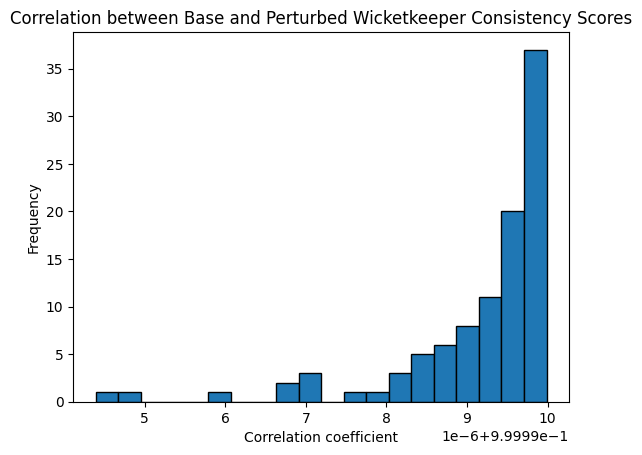

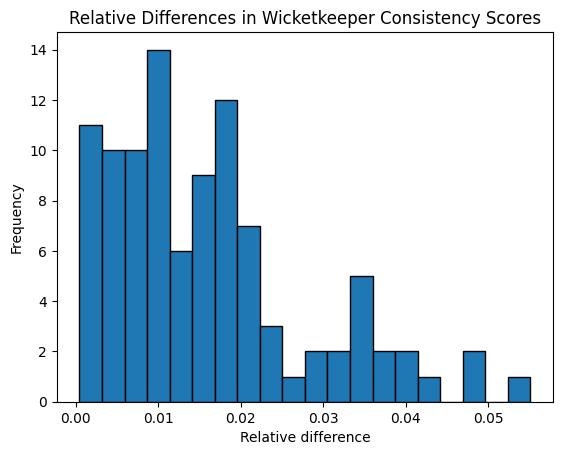

Mean correlation: 0.9999991584969534
Mean relative difference: 0.015965296838923237


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'calculations_with_data' is your DataFrame containing the derived metrics
# and 'hybrid_weights_boosted' is your final weight Series with the index corresponding to:
features = ['Inns_per_Mat', 'Dismissed', 'Catches_per_Dismissed', 
            'Stumpings_per_Dismissed', 'MaxDisInns_per_Inns', 'DisInn']

# Define a function to compute the composite consistency score for wicketkeepers
def compute_consistency_score(df, weights):
    # Make sure the DataFrame columns are in the same order as weights.index
    return np.dot(df[weights.index].values, weights.values)

# Compute the base consistency scores with your nominal weights
base_scores = compute_consistency_score(calculations_with_data, hybrid_weights_boosted)

# Set up sensitivity analysis parameters
n_iterations = 100  # Number of perturbation iterations
perturbation_factor = 0.05  # 5% noise
perturbed_scores_list = []

# Generate perturbed weights and compute the corresponding consistency scores
for i in range(n_iterations):
    # Create random noise: normally distributed noise with 0 mean and 5% standard deviation
    noise = np.random.normal(loc=0, scale=perturbation_factor, size=len(hybrid_weights_boosted))
    
    # Apply the noise multiplicatively to each weight
    perturbed_weights = hybrid_weights_boosted * (1 + noise)
    
    # Renormalize to ensure the weights sum to 1
    perturbed_weights = perturbed_weights / perturbed_weights.sum()
    
    # Compute consistency score with perturbed weights
    perturbed_scores = compute_consistency_score(calculations_with_data, perturbed_weights)
    perturbed_scores_list.append(perturbed_scores)

# For each perturbed set, compute the correlation with the base scores
correlations = [np.corrcoef(base_scores, scores)[0, 1] for scores in perturbed_scores_list]

# Also compute the mean relative difference between perturbed scores and base scores
relative_differences = [
    np.mean(np.abs(scores - base_scores)) / np.mean(np.abs(base_scores))
    for scores in perturbed_scores_list
]

# Plot the distribution of correlation coefficients
plt.hist(correlations, bins=20, edgecolor='k')
plt.title("Correlation between Base and Perturbed Wicketkeeper Consistency Scores")
plt.xlabel("Correlation coefficient")
plt.ylabel("Frequency")
plt.show()

# Plot the distribution of relative differences
plt.hist(relative_differences, bins=20, edgecolor='k')
plt.title("Relative Differences in Wicketkeeper Consistency Scores")
plt.xlabel("Relative difference")
plt.ylabel("Frequency")
plt.show()

# Print summary statistics
print("Mean correlation:", np.mean(correlations))
print("Mean relative difference:", np.mean(relative_differences))


# FINAL CONSISTENCY SCORE CALCULATION
### Consistency Score (Wicketkeeper) = 0.180158 × (Inns / Mat) + 0.315081 × (Dismissed) + 0.197911 × (Catches taken) + 0.127135 × (Stumpings) + 0.117772 × (Max Dis Inns) + 0.061944 × (Dis / Inn)

In [13]:
import pandas as pd

# Load the Excel file
file_path = "/Users/pavanbandaru/Downloads/cricket-squad-selection/cleaned all season/wicket_keeperset_smat.xlsx"  # Update with your actual file path
df = pd.read_excel(file_path)

# Define weights from the formula
weights = {
    "Inns_per_Mat": 0.180158,
    "Dismissed": 0.315081,
    "Catches_taken": 0.197911,
    "Stumpings": 0.127135,
    "Max_Dis_Inns": 0.117772,
    "Dis_Inn": 0.061944
}

# Compute Inns / Mat
df["Inns_per_Mat"] = df["Inns"] / df["Mat"]

# Compute Consistency Score
df["Consistency_Score"] = (
    weights["Inns_per_Mat"] * df["Inns_per_Mat"] +
    weights["Dismissed"] * df["Dismissed"] +
    weights["Catches_taken"] * df["Catches taken"] +
    weights["Stumpings"] * df["Stumpings"] +
    weights["Max_Dis_Inns"] * df["Max Dis Inns"] +
    weights["Dis_Inn"] * df["Dis/Inn"]
)

# Save the updated file
output_file = "wicket_keeperset_Smat_updated_file.xlsx"
df.to_excel(output_file, index=False)

print(f"Updated Excel file saved as {output_file}")


Updated Excel file saved as wicket_keeperset_Smat_updated_file.xlsx


In [1]:
import pandas as pd

# Load the Excel file
file_path = "/Users/pavanbandaru/Downloads/cricket-squad-selection/codes/Consistency file xlsx/wicket_keeper_team_details 10.39.09 AM.xlsx"  # Update with actual file path
df = pd.read_excel(file_path)

# Convert relevant columns to numeric
cols_to_convert = ["Dismissed", "Catches taken", "Stumpings", "Max Dis Inns", "Dis/Inn"]
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Compute additional metrics
df["Inns_per_Mat_WK"] = df["Inns"] / df["Mat"]

# AHP Weights for Wicketkeeping
ahp_wk_weights = {
    "Inns_per_Mat": 0.114301,
    "Dismissed": 0.235849,
    "Catches_taken": 0.128471,
    "Stumpings": 0.123580,
    "Max_Dis_Inns": 0.157432,
    "Dis_Inn": 0.039473
}

# PCA Weights for Wicketkeeping
pca_wk_weights = {
    "Inns_per_Mat": 0.180158,
    "Dismissed": 0.315081,
    "Catches_taken": 0.197911,
    "Stumpings": 0.127135,
    "Max_Dis_Inns": 0.117772,
    "Dis_Inn": 0.061944
}

# Compute AHP and PCA Wicketkeeping Consistency Scores
df["Wicketkeeping_Consistency_AHP"] = (
    ahp_wk_weights["Inns_per_Mat"] * df["Inns_per_Mat_WK"] +
    ahp_wk_weights["Dismissed"] * df["Dismissed"] +
    ahp_wk_weights["Catches_taken"] * df["Catches taken"] +
    ahp_wk_weights["Stumpings"] * df["Stumpings"] +
    ahp_wk_weights["Max_Dis_Inns"] * df["Max Dis Inns"] +
    ahp_wk_weights["Dis_Inn"] * df["Dis/Inn"]
)

df["Wicketkeeping_Consistency_PCA"] = (
    pca_wk_weights["Inns_per_Mat"] * df["Inns_per_Mat_WK"] +
    pca_wk_weights["Dismissed"] * df["Dismissed"] +
    pca_wk_weights["Catches_taken"] * df["Catches taken"] +
    pca_wk_weights["Stumpings"] * df["Stumpings"] +
    pca_wk_weights["Max_Dis_Inns"] * df["Max Dis Inns"] +
    pca_wk_weights["Dis_Inn"] * df["Dis/Inn"]
)

# Save the updated file
output_file = "wicket_keeper_AHP_PCA_score.xlsx"
df.to_excel(output_file, index=False)

print(f"Updated Excel file saved as {output_file}")


Updated Excel file saved as wicket_keeper_AHP_PCA_score.xlsx
